In [2]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
len(train_data)

8982

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))# 
    for i,label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key)for(key, value)in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i-3,'?')for i in train_data[0]])


In [7]:
train_labels[10]

3

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation=('softmax')))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 394us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 97us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 95us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 97us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [=======================

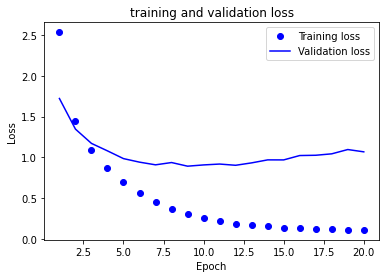

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

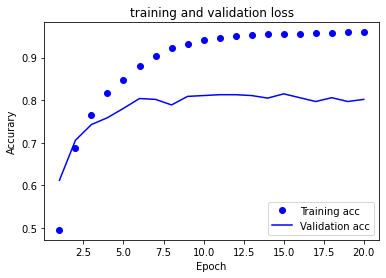

In [12]:
plt.clf()
acc=history.history['acc']
val_acc=history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accurary')
plt.legend()

In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation=('softmax')))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
model.fit(partial_x_train, partial_y_train,epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 109us/step - loss: 2.8046 - acc: 0.5038 - val_loss: 1.8434 - val_acc: 0.6300
Epoch 2/9
7982/7982 [==============================] - 1s 74us/step - loss: 1.5257 - acc: 0.6957 - val_loss: 1.3306 - val_acc: 0.7110
Epoch 3/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.1114 - acc: 0.7710 - val_loss: 1.1391 - val_acc: 0.7460
Epoch 4/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.8715 - acc: 0.8160 - val_loss: 1.0309 - val_acc: 0.7840
Epoch 5/9
7982/7982 [==============================] - 1s 74us/step - loss: 0.7030 - acc: 0.8477 - val_loss: 0.9683 - val_acc: 0.8020
Epoch 6/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.5660 - acc: 0.8753 - val_loss: 0.9421 - val_acc: 0.7980
Epoch 7/9
7982/7982 [==============================] - 1s 86us/step - loss: 0.4567 - acc: 0.9070 - val_loss: 0.9238 - val_acc: 0.7970
Epoch 8/9
798

In [16]:
predictions = model.predict(x_test)

In [ ]:
np.argmax(predictions)